# Bias-variance
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)

Let's build a model that can predict y for unknown inputs x.

Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

mse = 1204.249


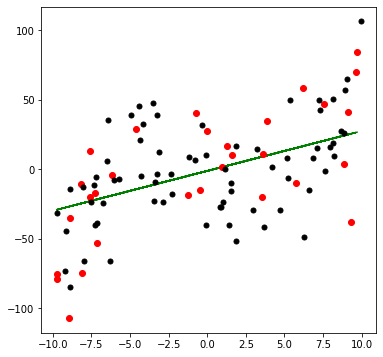

In [3]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lr = lm.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
#ax.plot(x, y, '--k')
ax.plot(x_test, y_pred, 'g')
ax.plot(x_test, y_test, 'or')
ax.plot(x_train, y_train, 'ok', ms=5)
print('mse = %.3f' % mse)

Fit polynomial models of degrees 1, 2, 3 and 4 to the training data, and report mean squared error (on both train and test sets) for all the models. Plot the data, the fitted models, and the predicted outputs.

Degree 1 train mse = 966.263
Degree 1 test mse = 1204.249
Degree 2 train mse = 959.519
Degree 2 test mse = 1276.392
Degree 3 train mse = 624.535
Degree 3 test mse = 1152.284
Degree 4 train mse = 622.413
Degree 4 test mse = 1183.199


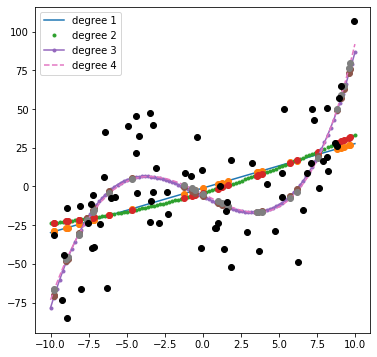

In [4]:
degs = [1, 2, 3, 4]
plot_styles = ['-', '.', '.-', '--']
point_colors = ['blue', 'orange', 'red', 'black']
lrp = lm.LinearRegression()
x_all = np.linspace(-10,10,101)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
for deg, plot_style, point_color in zip(degs, plot_styles, point_colors):
    lrp.fit(np.vander(np.squeeze(x_train), deg+1), y_train)
    y_pred = lrp.predict(np.vander(np.squeeze(x_test), deg+1))
    y_all = lrp.predict(np.vander(np.squeeze(x_all), deg+1))
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = lrp.predict(np.vander(np.squeeze(x_train), deg+1))
    mse_train = mean_squared_error(y_train, y_pred_train)
    ax.plot(x_all, y_all, plot_style, label='degree %d' % deg)
    ax.plot(x_test, y_pred, 'o')
    ax.legend(loc=2)
    print('Degree %d train mse = %.3f' % (deg, mse_train))
    print('Degree %d test mse = %.3f' % (deg, mse))
ax.plot(x_train, y_train, 'ok')

The polynomial model of degree 3 performed the best.